<a href="https://colab.research.google.com/github/profMoura/Challenge-Alura-Store/blob/main/Notebook_Colab/AluraStoreBr(RAPHAEL_MOURA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estrutura do código para o Desafio Alura Store**

### Importação dos dados



In [99]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [176]:
#calculo do faturamento de cada loja
faturamento_loja1 = sum(loja.Preço)
faturamento_loja2 = sum(loja2.Preço)
faturamento_loja3 = sum(loja3.Preço)
faturamento_loja4 = sum(loja4.Preço)

print(f"O faturamento da loja 1 foi de {round(faturamento_loja1, 2)}")
print(f"O faturamento da loja 2 foi de {round(faturamento_loja2, 2)}")
print(f"O faturamento da loja 3 foi de {round(faturamento_loja3, 2)}")
print(f"O faturamento da loja 4 foi de {round(faturamento_loja4, 2)}")

df = {"loja1": [faturamento_loja1], "loja2": [faturamento_loja2], "loja3": [faturamento_loja3], "loja4": [faturamento_loja4]}
df = pd.DataFrame(df)
df.index = ["Faturamento"]
df

O faturamento da loja 1 foi de 1534509.12
O faturamento da loja 2 foi de 1488459.06
O faturamento da loja 3 foi de 1464025.03
O faturamento da loja 4 foi de 1384497.58


,loja1,loja2,loja3,loja4
Faturamento,1534509.12,1488459.06,1464025.03,1384497.58


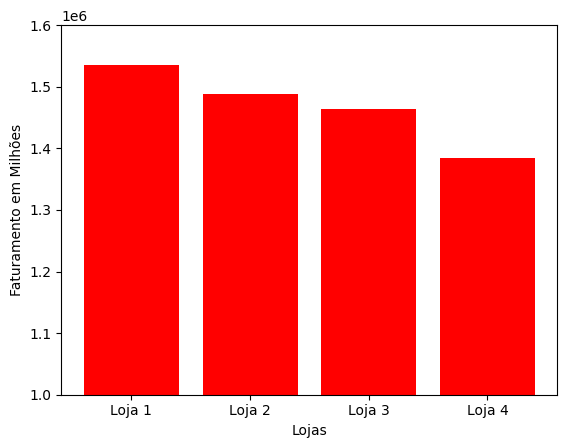

In [139]:
#importando biblioteca de gráficos
import matplotlib.pyplot as plt

plt.bar(["Loja 1", "Loja 2", "Loja 3", "Loja 4"], [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4], color="red")
plt.ylabel("Faturamento em Milhões")
plt.xlabel("Lojas")
plt.ylim(1000000, 1600000)
plt.show()

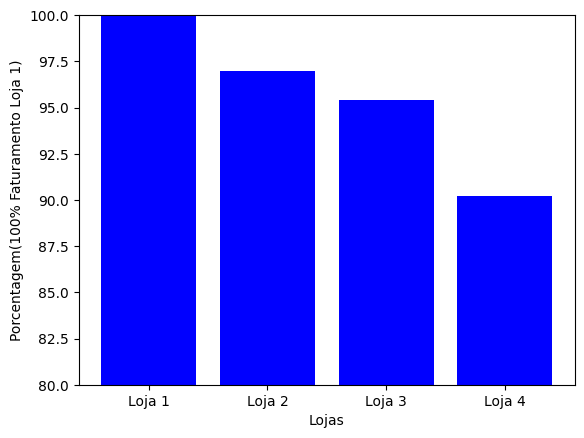

In [102]:
#calculo do faturamento em porcentagem com basa na loja de maior faturamento
porcentagem_loja1 = round((faturamento_loja1/faturamento_loja1)*100, 2)
porcentagem_loja2 = round((faturamento_loja2/faturamento_loja1)*100, 2)
porcentagem_loja3 = round((faturamento_loja3/faturamento_loja1)*100, 2)
porcentagem_loja4 = round((faturamento_loja4/faturamento_loja1)*100, 2)

plt.bar(["Loja 1", "Loja 2", "Loja 3", "Loja 4"], [porcentagem_loja1, porcentagem_loja2, porcentagem_loja3, porcentagem_loja4], color="blue")
plt.ylabel("Porcentagem(100% Faturamento Loja 1)")
plt.xlabel("Lojas")
plt.ylim(80,100)
plt.show()

# 2. Vendas por Categoria


In [103]:
#LOJA 1

#Identificar o faturamento de cada categoria para uma loja em especifico

#Separando em 2 listas
categoria_loja1 = list(loja["Categoria do Produto"])
preco = list(loja["Preço"])

#gerando um dicionário vazio para unir as listas
faturamento_por_categoria = {}

# For para unir as listas em dicionário e somar o valor dos produtos vendidos em cada categoria
for i in range(len(categoria_loja1)):
  if categoria_loja1[i] not in faturamento_por_categoria:
    faturamento_por_categoria[categoria_loja1[i]] = preco[i]

  else:
    faturamento_por_categoria[categoria_loja1[i]] += preco[i]


guardar_faturamento = faturamento_por_categoria

guardar_faturamento = pd.DataFrame.from_dict(guardar_faturamento, orient="index")
guardar_faturamento.columns = ["Faturamento"]
display(guardar_faturamento)




,Faturamento
eletronicos,572659.23
moveis,250178.11
brinquedos,23993.78
eletrodomesticos,484913.36
utilidades domesticas,16931.48
esporte e lazer,52387.55
livros,11713.92
instrumentos musicais,121731.69


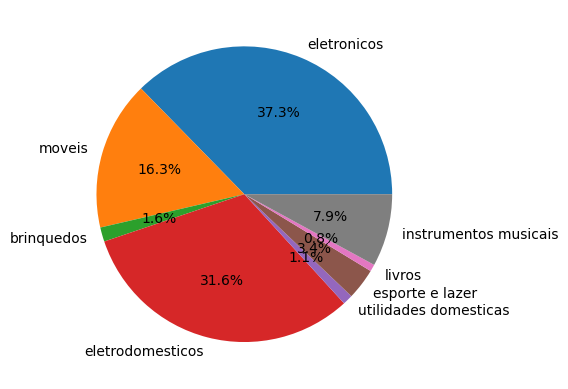

In [104]:
plt.pie(guardar_faturamento["Faturamento"], labels=guardar_faturamento.index, autopct="%1.1f%%")
plt.show()


,loja1
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


O total de produtos vendidos é: 2359


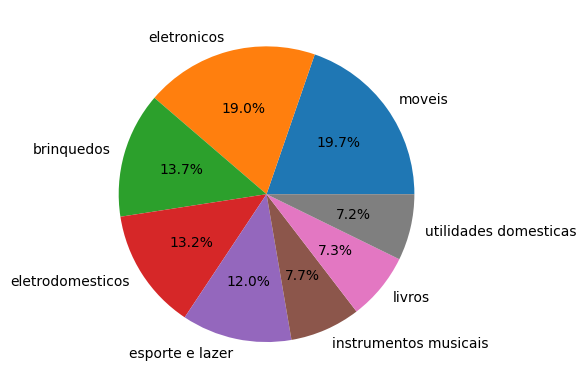

In [105]:
#LOJA 01
#Identificar a quantidade de produtos vendidos para uma loja
categoria_loja1 = {'loja1': loja["Categoria do Produto"].value_counts()}
categoria_loja1 = pd.DataFrame(categoria_loja1)
display(categoria_loja1)

soma = sum(categoria_loja1["loja1"])

plt.pie(categoria_loja1["loja1"], labels=categoria_loja1.index, autopct="%1.1f%%")

print(f'O total de produtos vendidos é: {soma}')

,Faturamento
moveis,235234.68
instrumentos musicais,139987.03
esporte e lazer,46326.09
eletronicos,547773.71
utilidades domesticas,19662.86
brinquedos,21262.21
eletrodomesticos,464758.13
livros,13454.35


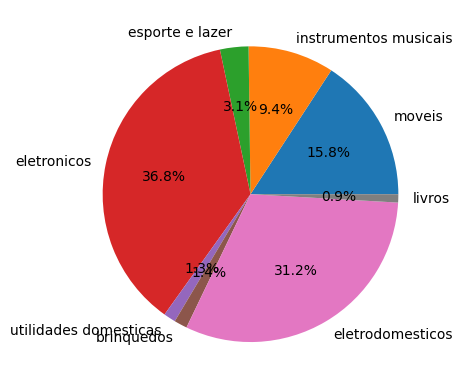

In [149]:
#LOJA 2

#Identificar o faturamento de cada categoria para uma loja em especifico

#Separando em 2 listas
categoria_loja2 = list(loja2["Categoria do Produto"])
preco2 = list(loja2["Preço"])

#gerando um dicionário vazio para unir as listas
faturamento_por_categoria2 = {}

# For para unir as listas em dicionário e somar o valor dos produtos vendidos em cada categoria
for i in range(len(categoria_loja2)):
  if categoria_loja2[i] not in faturamento_por_categoria2:
    faturamento_por_categoria2[categoria_loja2[i]] = preco2[i]

  else:
    faturamento_por_categoria2[categoria_loja2[i]] += preco2[i]

guardar_faturamento2 = faturamento_por_categoria2
guardar_faturamento2 = pd.DataFrame.from_dict(guardar_faturamento2, orient="index")
guardar_faturamento2.columns = ["Faturamento"]
display(guardar_faturamento2)

plt.pie(guardar_faturamento2["Faturamento"], labels=guardar_faturamento2.index, autopct="%1.1f%%")
plt.show()

2359


,loja2
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


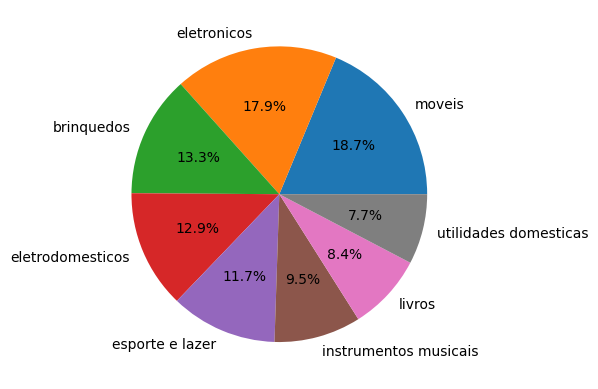

In [107]:
#LOJA 02
#Identificar a quantidade de produtos vendidos para uma loja

categoria_loja2 = {'loja2': loja2["Categoria do Produto"].value_counts()}
categoria_loja2 = pd.DataFrame(categoria_loja2)

soma2 = sum(categoria_loja2["loja2"])
print(soma2)
plt.pie(categoria_loja2["loja2"], labels=categoria_loja2.index, autopct="%1.1f%%")
categoria_loja2

,Faturamento
eletrodomesticos,438984.89
moveis,268095.56
instrumentos musicais,103174.45
esporte e lazer,47456.10
eletronicos,547699.92
brinquedos,25869.20
utilidades domesticas,20080.21
livros,12664.70


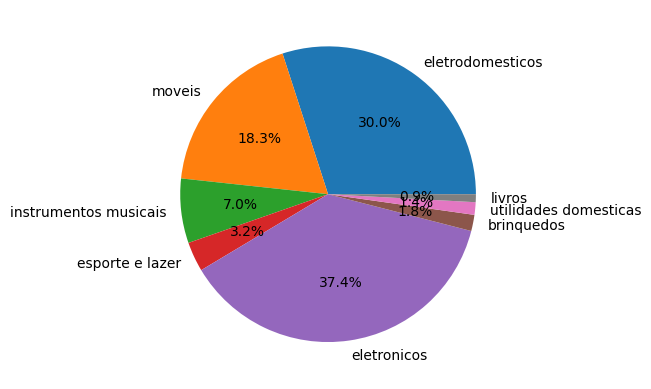

In [151]:
#LOJA 3

#Identificar o faturamento de cada categoria para uma loja em especifico

#Separando em 2 listas
categoria_loja3 = list(loja3["Categoria do Produto"])
preco3 = list(loja3["Preço"])

#gerando um dicionário vazio para unir as listas
faturamento_por_categoria3 = {}

# For para unir as listas em dicionário e somar o valor dos produtos vendidos em cada categoria
for i in range(len(categoria_loja3)):
  if categoria_loja3[i] not in faturamento_por_categoria3:
    faturamento_por_categoria3[categoria_loja3[i]] = preco3[i]

  else:
    faturamento_por_categoria3[categoria_loja3[i]] += preco3[i]

guardar_faturamento3 = faturamento_por_categoria3
guardar_faturamento3 = pd.DataFrame.from_dict(guardar_faturamento3, orient="index")
guardar_faturamento3.columns = ["Faturamento"]
display(guardar_faturamento3)

plt.pie(guardar_faturamento3["Faturamento"], labels=guardar_faturamento3.index, autopct="%1.1f%%")
plt.show()

2359


,loja3
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


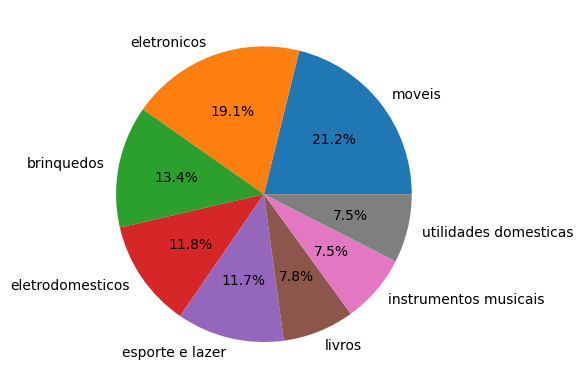

In [109]:
#LOJA 03
#Identificar a quantidade de produtos vendidos para uma loja

categoria_loja3 = {'loja3': loja3["Categoria do Produto"].value_counts()}
categoria_loja3 = pd.DataFrame(categoria_loja3)

soma3 = sum(categoria_loja3["loja3"])
print(soma3)
plt.pie(categoria_loja3["loja3"], labels=categoria_loja3.index, autopct="%1.1f%%")
categoria_loja3

,Faturamento
eletrodomesticos,377680.65
moveis,256705.65
esporte e lazer,44465.65
livros,12427.77
eletronicos,545966.86
instrumentos musicais,100136.50
brinquedos,27015.67
utilidades domesticas,20098.83


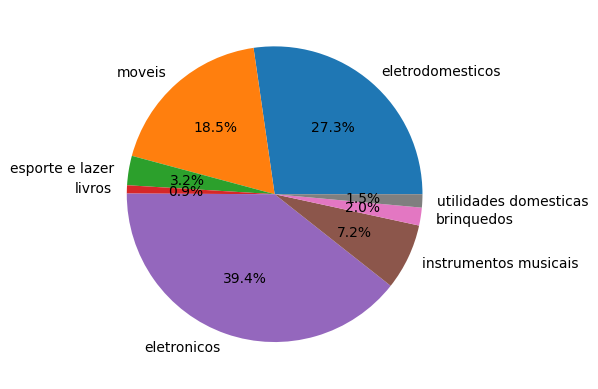

'faturamento_por_categoria4 = pd.DataFrame.from_dict(faturamento_por_categoria4, orient="index")\nplt.pie(faturamento_por_categoria4[0], labels=faturamento_por_categoria4.index, autopct="%1.1f%%")\ndisplay(faturamento_por_categoria4)\nsoma_faturamento_loja4 = sum(faturamento_por_categoria4[0])\nprint(f"O faturamento total da loja 1 foi de {round(soma_faturamento_loja4, 2)}")'

In [154]:
#LOJA 4

#Identificar o faturamento de cada categoria para uma loja em especifico

#Separando em 2 listas
categoria_loja4 = list(loja4["Categoria do Produto"])
preco4 = list(loja4["Preço"])

#gerando um dicionário vazio para unir as listas
faturamento_por_categoria4 = {}

# For para unir as listas em dicionário e somar o valor dos produtos vendidos em cada categoria
for i in range(len(categoria_loja4)):
  if categoria_loja4[i] not in faturamento_por_categoria4:
    faturamento_por_categoria4[categoria_loja4[i]] = preco4[i]

  else:
    faturamento_por_categoria4[categoria_loja4[i]] += preco4[i]

guardar_faturamento4 = faturamento_por_categoria4
guardar_faturamento4 = pd.DataFrame.from_dict(guardar_faturamento4, orient="index")
guardar_faturamento4.columns = ["Faturamento"]
display(guardar_faturamento4)

plt.pie(guardar_faturamento4["Faturamento"], labels=guardar_faturamento4.index, autopct="%1.1f%%")
plt.show()

'''faturamento_por_categoria4 = pd.DataFrame.from_dict(faturamento_por_categoria4, orient="index")
plt.pie(faturamento_por_categoria4[0], labels=faturamento_por_categoria4.index, autopct="%1.1f%%")
display(faturamento_por_categoria4)
soma_faturamento_loja4 = sum(faturamento_por_categoria4[0])
print(f"O faturamento total da loja 1 foi de {round(soma_faturamento_loja4, 2)}")'''

2358


,loja4
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


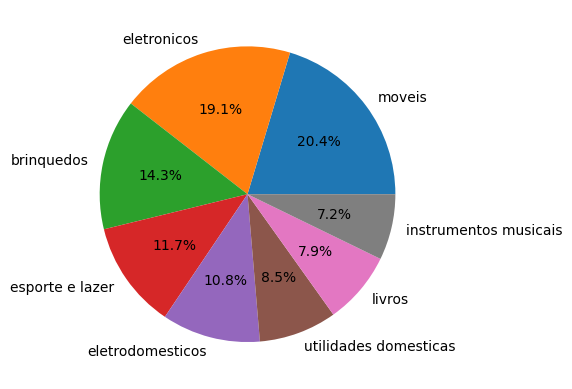

In [111]:
#loja 4
categoria_loja4 = {'loja4': loja4["Categoria do Produto"].value_counts()}
categoria_loja4 = pd.DataFrame(categoria_loja4)


soma4 = sum(categoria_loja4["loja4"])
print(soma4)
plt.pie(categoria_loja4["loja4"], labels=categoria_loja4.index, autopct="%1.1f%%")
categoria_loja4

# 3. Média de Avaliação das Lojas

,Média de Avaliação
loja1,3.98
loja2,4.04
loja3,4.05
loja4,4.00


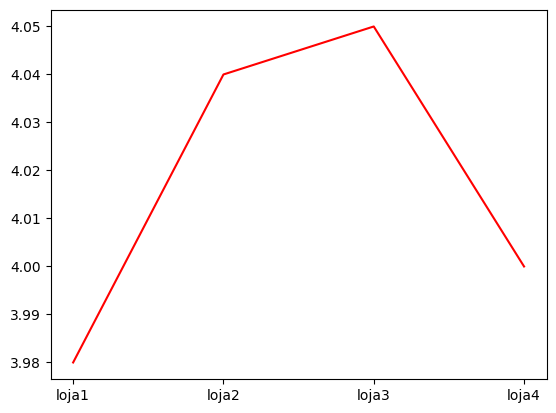

In [161]:
avaliacao_loja1 = list(loja["Avaliação da compra"])
media_loja1 = round(sum(avaliacao_loja1)/len(avaliacao_loja1), 2)

avaliacao_loja2 = list(loja2["Avaliação da compra"])
media_loja2 = round(sum(avaliacao_loja2)/len(avaliacao_loja2), 2)

avaliacao_loja3 = list(loja3["Avaliação da compra"])
media_loja3 = round(sum(avaliacao_loja3)/len(avaliacao_loja3), 2)

avaliacao_loja4 = list(loja4["Avaliação da compra"])
media_loja4 = round(sum(avaliacao_loja4)/len(avaliacao_loja4), 2)

avaliacoes_lojas = {"loja1": media_loja1, "loja2": media_loja2, "loja3": media_loja3, "loja4": media_loja4}
avaliacoes_lojas = pd.DataFrame.from_dict(avaliacoes_lojas, orient="index")
avaliacoes_lojas.columns = ["Média de Avaliação"]
display(avaliacoes_lojas)

plt.plot(avaliacoes_lojas.index, avaliacoes_lojas["Média de Avaliação"], color="red")

# 4. Produtos Mais e Menos Vendidos

In [166]:
produtos_vendidos1 = {"loja1": loja["Produto"].value_counts()}
produtos_vendidos1 = pd.DataFrame(produtos_vendidos1)
display(produtos_vendidos1)

produtos_vendidos2 = {"loja2": loja2["Produto"].value_counts()}
produtos_vendidos2 = pd.DataFrame(produtos_vendidos2)
display(produtos_vendidos2)

produtos_vendidos3 = {"loja3": loja3["Produto"].value_counts()}
produtos_vendidos3 = pd.DataFrame(produtos_vendidos3)
display(produtos_vendidos3)

produtos_vendidos4 = {"loja4": loja4["Produto"].value_counts()}
produtos_vendidos4 = pd.DataFrame(produtos_vendidos4)
display(produtos_vendidos4)




,loja1
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56
Blocos de montar,56
Bola de basquete,55
Bicicleta,54
Copo térmico,54


,loja2
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58
Secadora de roupas,57
Celular Plus X42,55
Blocos de montar,54
Guarda roupas,54


,loja3
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55
Smart TV,54
Fogão,53
Corda de pular,53
Modelagem preditiva,53


,loja4
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55
Mesa de jantar,55
Cômoda,55
Smart TV,54
Blocos de montar,54


In [114]:
colunas = ["loja1", "loja2", "loja3", "loja4"]
produtos_vendidos = {"loja1": loja["Produto"].value_counts(), "loja2": loja2["Produto"].value_counts(), "loja3": loja3["Produto"].value_counts(), "loja4": loja4["Produto"].value_counts()}
produtos_vendidos



{'loja1': Produto
 Micro-ondas                    60
 TV Led UHD 4K                  60
 Guarda roupas                  60
 Secadora de roupas             58
 Cômoda                         56
 Blocos de montar               56
 Bola de basquete               55
 Bicicleta                      54
 Copo térmico                   54
 Geladeira                      54
 Impressora                     54
 Bateria                        53
 Faqueiro                       52
 Carrinho controle remoto       52
 Modelagem preditiva            51
 Fone de ouvido                 50
 Xadrez de madeira              49
 Celular Plus X42               49
 Lava louças                    48
 Lavadora de roupas             47
 Guitarra                       47
 Violão                         46
 Sofá retrátil                  46
 Cadeira de escritório          46
 Fogão                          45
 Cama box                       44
 Kit banquetas                  44
 Smart TV                       44
 C

# 5. Frete Médio por Loja


,Faturamento Menos Frete
loja1,1452671.15
loja2,1409144.90
loja3,1386002.37
loja4,1310741.70


<BarContainer object of 4 artists>

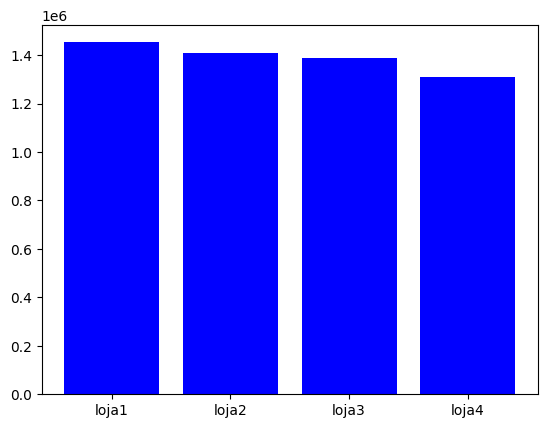

In [183]:
#Calculo do faturamento menos frete
faturamento_menos_frete_loja1 = round(faturamento_loja1 - sum(loja["Frete"]), 2)
faturamento_menos_frete_loja1

faturamento_menos_frete_loja2 = round(faturamento_loja2 - sum(loja2["Frete"]), 2)
faturamento_menos_frete_loja2

faturamento_menos_frete_loja3 = round(faturamento_loja3 - sum(loja3["Frete"]), 2)
faturamento_menos_frete_loja3

faturamento_menos_frete_loja4 = round(faturamento_loja4 - sum(loja4["Frete"]), 2)
faturamento_menos_frete_loja4

colunas = ["loja1", "loja2", "loja3", "loja4"]
faturamento_menos_frete = {"loja1": faturamento_menos_frete_loja1, "loja2": faturamento_menos_frete_loja2, "loja3": faturamento_menos_frete_loja3, "loja4": faturamento_menos_frete_loja4}

faturamento_menos_frete = pd.DataFrame.from_dict(faturamento_menos_frete, orient="index")
faturamento_menos_frete.columns = ["Faturamento Menos Frete"]
display(faturamento_menos_frete)

plt.bar(faturamento_menos_frete.index, faturamento_menos_frete["Faturamento Menos Frete"], color="blue")

,Frete Médio
loja1,34.69
loja2,33.62
loja3,33.07
loja4,31.28


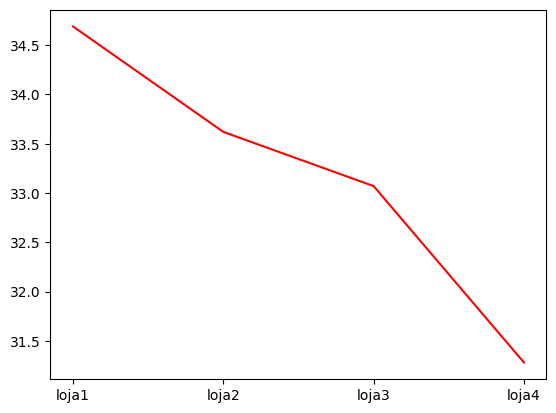

In [179]:
#calculo valor do frete médio.
frete_loja1 = round(sum(loja["Frete"])/len(loja["Frete"]), 2)
frete_loja1
frete_loja2 = round(sum(loja2["Frete"])/len(loja2["Frete"]), 2)
frete_loja2
frete_loja3 = round(sum(loja3["Frete"])/len(loja3["Frete"]), 2)
frete_loja3
frete_loja4 = round(sum(loja4["Frete"])/len(loja4["Frete"]), 2)
frete_loja4

colunas = ["loja1", "loja2", "loja3", "loja4"]
frete = {"loja1": frete_loja1, "loja2": frete_loja2, "loja3": frete_loja3, "loja4": frete_loja4}
frete = pd.DataFrame.from_dict(frete, orient="index")
frete.columns = ["Frete Médio"]
display(frete)

plt.plot(frete.index, frete["Frete Médio"], color="red")

#**Relatório de Dados das Lojas**




##**Introdução:**
Com base no banco de dados fornecido, foi analisado o desempenho de quatro lojas, seguindo os seguintes parametros de desenvolvimento:

*   O faturamento total das lojas;
*   As categorias de produtos mais e menos vendidas;
*   A média das avaliações de clientes por loja;
*   Os produtos mais e menos vendidos;
*   O frete médio de cada loja.

Para cada parametro será apresentado o seu desenvolvimento e dados que possam auxiliar na escola da loja a ser vendida.



##**Desenvolvimento:**



###**1.Faturamento Total**

Operando em cima da coluna preços, podemos obter o faturamento total de cada uma das lojas, afim de facilitar a visualização dos dados iremos apresentar os resultados de três formas distintas.



####**Tabela:**
*mostra o valor do faturamento total de cada uma das lojas, soma de todos os valores vendidos.*


In [117]:
df

,loja1,loja2,loja3,loja4
Faturamento,1534509.12,1488459.06,1464025.03,1384497.58


###**Gráfico Faturamento**
*Mostra o faturamento de cada uma das lojas em milhões de reais.*

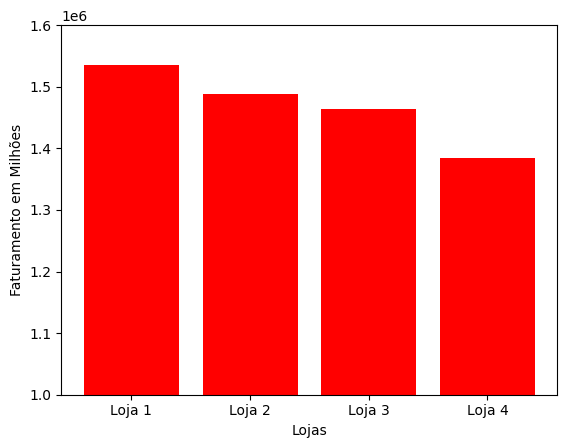

In [118]:
plt.bar(["Loja 1", "Loja 2", "Loja 3", "Loja 4"], [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4], color="red")
plt.ylabel("Faturamento em Milhões")
plt.xlabel("Lojas")
plt.ylim(1000000, 1600000)
plt.show()

###**Gráfico Porcentagem**
*Tomando a loja que mais fatura com 100% (loja 1), mostramos o desempenho das outras lojas com base nesta.*

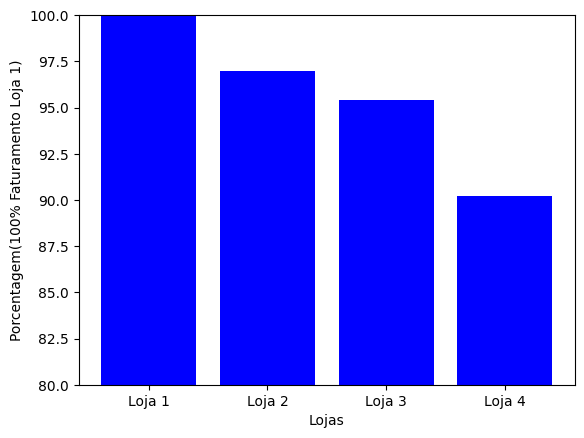

In [119]:
plt.bar(["Loja 1", "Loja 2", "Loja 3", "Loja 4"], [porcentagem_loja1, porcentagem_loja2, porcentagem_loja3, porcentagem_loja4], color="blue")
plt.ylabel("Porcentagem(100% Faturamento Loja 1)")
plt.xlabel("Lojas")
plt.ylim(80,100)
plt.show()

Com base nos dados apresentados é possível destacar, nessa primeira métrica, que a loja que mais se destaca é a loja 1 e a de desempenho mais abixo é a loja 4.

###**2.Vendas por Categorias**

Nessa parametro nosso objetivo é fornecer uma classificação das categorias mais vendidas em cada loja.
Para cada loja vamos mostar os valores obtidos através de tabelas e gráficos.



####**a) Loja 1:**
#####**Tabela 1.1**
*Quantidade de produtos vendidos em cada categoria.*


In [120]:
categoria_loja1 = {'loja1': loja["Categoria do Produto"].value_counts()}
categoria_loja1 = pd.DataFrame(categoria_loja1)
display(categoria_loja1)


,loja1
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


Podemos observar que as quatro categorias que mais vendem nessa loja são móveis, eletrônicos, brinquedos e eletrodomésticos, respectivamente.
#####**Gráfico 1.1:**
*Mostra a porcentagem que cada categoria vendeu.* *texto em itálico*

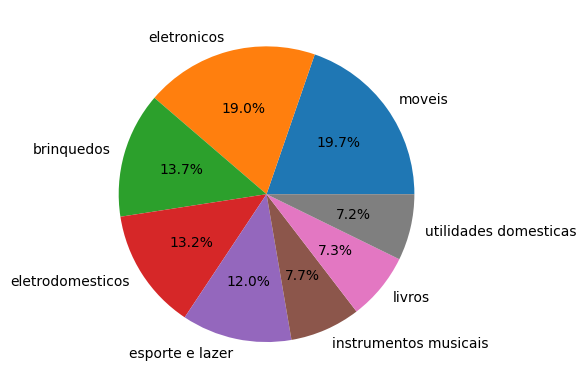

In [121]:
plt.pie(categoria_loja1["loja1"], labels=categoria_loja1.index, autopct="%1.1f%%")
plt.show()


As categorias que mais vendem, representam 65,6% das vendas nessa loja.
#####**Tabela 2.1**
*Faturamento dos produtos vendidos em cada categoria.*

In [122]:
guardar_faturamento = faturamento_por_categoria

guardar_faturamento = pd.DataFrame.from_dict(guardar_faturamento, orient="index")
guardar_faturamento.columns = ["Faturamento"]
display(guardar_faturamento)

,Faturamento
eletronicos,572659.23
moveis,250178.11
brinquedos,23993.78
eletrodomesticos,484913.36
utilidades domesticas,16931.48
esporte e lazer,52387.55
livros,11713.92
instrumentos musicais,121731.69


Apesar das categorias que mais vendem serem móveis, eletrônicos, brinquedos e eletrodomésticos.
As que mais faturam são **eletrônicos, eletrodomésticos, móveis e instrumentos músicais** nesta ordem.

#####**Gráfico 2.1:**
*Mostra a porcentagem do faturamento que cada categoria vendeu.*

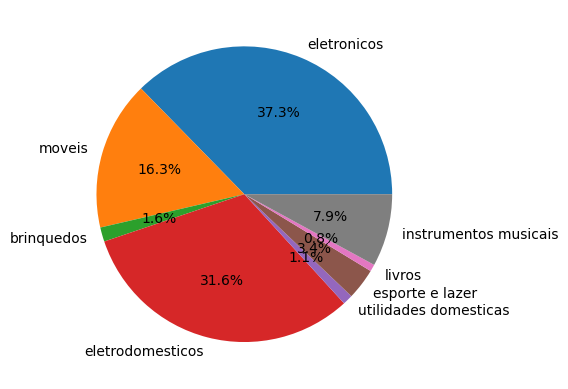

In [123]:
plt.pie(guardar_faturamento["Faturamento"], labels=guardar_faturamento.index, autopct="%1.1f%%")
plt.show()

Esse olhar para o faturamento por categoria é importante, pois vemos que as quatro categorias destacadas acima, representam 93,1% do faturamento da loja.
Um importante destaque é que a categoria instrumentos musicais, que a principio, vende poucos produtos, em relação as categorias destacadas na *Tabela1*, representa, aproximadamente, 8% do faturamento da loja.

####**b) Loja 2:**
#####**Tabela 1.2**
*Quantidade de produtos vendidos em cada categoria.*

In [124]:
categoria_loja2 = {'loja2': loja2["Categoria do Produto"].value_counts()}
categoria_loja2 = pd.DataFrame(categoria_loja2)
display(categoria_loja2)

,loja2
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


#####**Gráfico 1.2:**
*Mostra a porcentagem que cada categoria vendeu.*

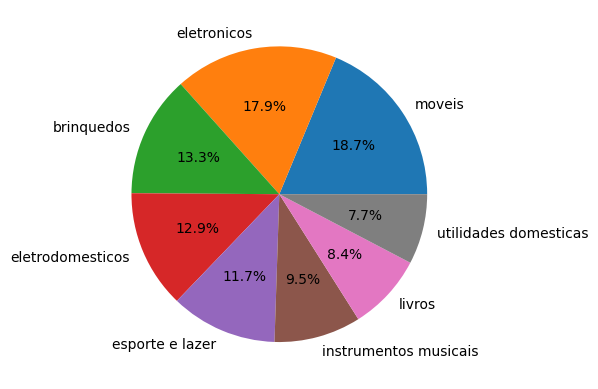

In [125]:
plt.pie(categoria_loja2["loja2"], labels=categoria_loja2.index, autopct="%1.1f%%")
plt.show()


Com o auxilio da tabela1.2 e do gráfico 1.2 e comparando com a loja 1, fica em destaque que as quatro categorias que mais vendem se mantém, porém com porcentagens menores.

Em seguinda, vamos olhar para o faturamento para observar se vemos algo mais discrepante.

#####**Tabela 2.2**
*Faturamento dos produtos vendidos em cada categoria.*

In [126]:
guardar_faturamento2 = faturamento_por_categoria2
guardar_faturamento2 = pd.DataFrame.from_dict(guardar_faturamento2, orient="index")
guardar_faturamento2.columns = ["Faturamento"]
display(guardar_faturamento2)

,Faturamento
moveis,235234.68
instrumentos musicais,139987.03
esporte e lazer,46326.09
eletronicos,547773.71
utilidades domesticas,19662.86
brinquedos,21262.21
eletrodomesticos,464758.13
livros,13454.35


#####**Gráfico 2.2:**
*Mostra a porcentagem do faturamento que cada categoria vendeu.*

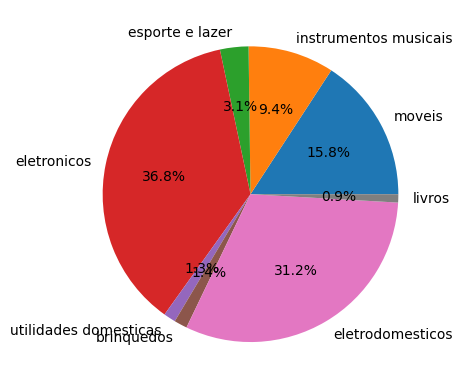

In [127]:
plt.pie(guardar_faturamento2["Faturamento"], labels=guardar_faturamento2.index, autopct="%1.1f%%")
plt.show()

Analisando os padrões, com base no faturamento, notamos o mesmo comportamento das categorias de maior faturamento da loja 1, com um destaque ainda maior para os instrumentos musicais, que apresentam uma maior porcentagem no todo da loja 2 e um valor real de faturamento maior que o da loja 1.

Categorias de maior faturamento: eletrônicos, eletrodomésticos, móveis e instrumentos músicais.

Representando 93,2% do faturamento total da loja 2.

####**c) Loja 3:**
#####**Tabela 1.3**
*Quantidade de produtos vendidos em cada categoria.*

In [128]:
categoria_loja3 = {'loja3': loja3["Categoria do Produto"].value_counts()}
categoria_loja3 = pd.DataFrame(categoria_loja3)
display(categoria_loja3)


,loja3
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


#####**Gráfico 1.3:**
*Mostra a porcentagem que cada categoria vendeu.*

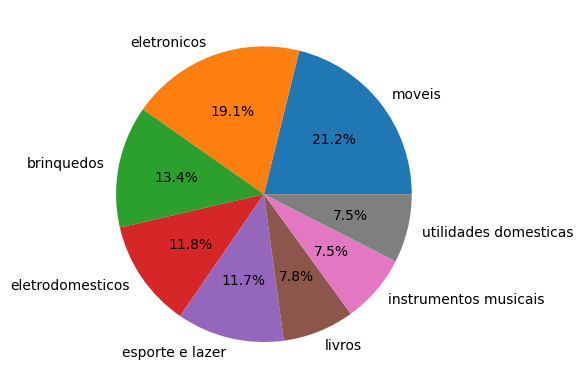

In [129]:
plt.pie(categoria_loja3["loja3"], labels=categoria_loja3.index, autopct="%1.1f%%")
plt.show()

A loja 3 mantém o padrão das outras duas lojas, porém aqui vale destacar a categorias esporte e lazer, que praticamente, empata com a categoria eletrodométicos.

#####**Tabela 2.3**
*Faturamento dos produtos vendidos em cada categoria.*

In [152]:
guardar_faturamento3 = faturamento_por_categoria3
guardar_faturamento3 = pd.DataFrame.from_dict(guardar_faturamento3, orient="index")
guardar_faturamento3.columns = ["Faturamento"]
display(guardar_faturamento3)

,Faturamento
eletrodomesticos,438984.89
moveis,268095.56
instrumentos musicais,103174.45
esporte e lazer,47456.10
eletronicos,547699.92
brinquedos,25869.20
utilidades domesticas,20080.21
livros,12664.70


#####**Gráfico 2.3:**
*Mostra a porcentagem do faturamento que cada categoria vendeu.*

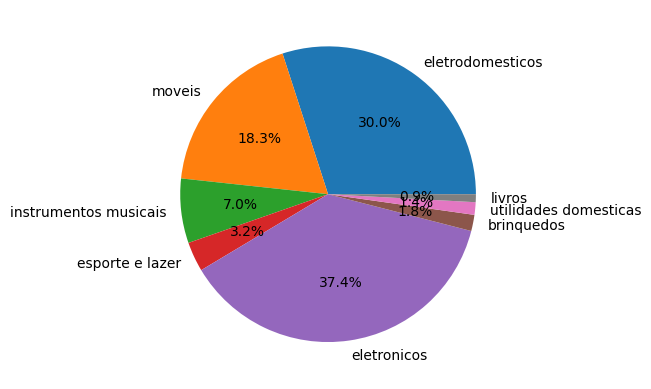

In [153]:
plt.pie(guardar_faturamento3["Faturamento"], labels=guardar_faturamento3.index, autopct="%1.1f%%")
plt.show()

A loja 3 mantém o padrão das outras duas lojas, na questão do faturamento.

Categorias de maior faturamento: eletrônicos, eletrodomésticos, móveis e instrumentos músicais.

Representando 92,7% do faturamento total da loja 3.

####**d) Loja 4:**
#####**Tabela 1.4**
*Quantidade de produtos vendidos em cada categoria.*

In [132]:
categoria_loja4 = {'loja4': loja4["Categoria do Produto"].value_counts()}
categoria_loja4 = pd.DataFrame(categoria_loja4)
display(categoria_loja4)


,loja4
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


#####**Gráfico 1.4:**
*Mostra a porcentagem que cada categoria vendeu.*

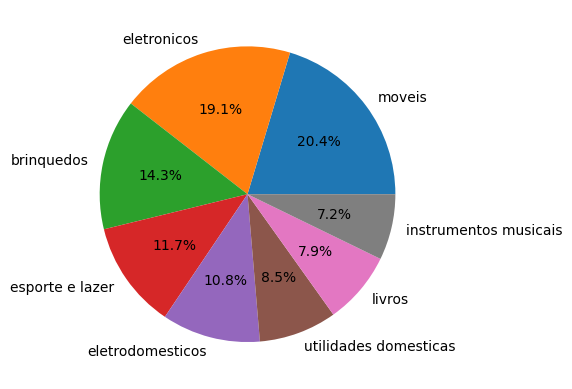

In [133]:
plt.pie(categoria_loja4["loja4"], labels=categoria_loja4.index, autopct="%1.1f%%")
plt.show()

Para a loja 4, notamos uma mudança de padrão na quantidade de vendas por categoria.
A categoria **esporte e lazer** vende mais que a categoria **eletrodomésticos**, assim como a categoria **instrumentos músicais** também vende menos que as outras três lojas.
Isso pode estar impactando consideravelmente no faturamento da loja, com a próxima tabela e gráfico, teremos um olhar específico para esse tópico.

#####**Tabela 2.4**
*Faturamento dos produtos vendidos em cada categoria.*

In [156]:
guardar_faturamento4 = faturamento_por_categoria4
guardar_faturamento4 = pd.DataFrame.from_dict(guardar_faturamento4, orient="index")
guardar_faturamento4.columns = ["Faturamento"]
display(guardar_faturamento4)


,Faturamento
eletrodomesticos,377680.65
moveis,256705.65
esporte e lazer,44465.65
livros,12427.77
eletronicos,545966.86
instrumentos musicais,100136.50
brinquedos,27015.67
utilidades domesticas,20098.83


#####**Gráfico 2.4:**
*Mostra a porcentagem do faturamento que cada categoria vendeu.*

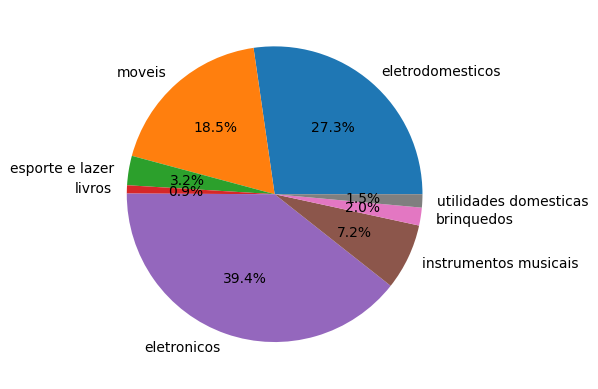

In [157]:
plt.pie(guardar_faturamento4["Faturamento"], labels=guardar_faturamento4.index, autopct="%1.1f%%")
plt.show()

Analisando a tabela e o gráfico de faturamento da loja 4, notamos que a redução nas vendas de eletrodomésticos e instrumentos musicais impacta consideravelmente o desempenho desta loja em relação as outras, por esse motivo apresenta um faturamento menor, com destaque a categoria de **eletrodomésticos**.



###**3.Avaliação das Lojas**

Nessa parametro nosso objetivo é fornecer uma classificação da média da avaliação das lojas, afim de observar o grau de satisfação dos clientes em relação a cada uma das lojas.

#####**Tabela Média das Avaliações**
*A tabela mostra o desempenho médio de como os clientes avaliam cada uma das lojas.*

In [162]:
avaliacoes_lojas = {"loja1": media_loja1, "loja2": media_loja2, "loja3": media_loja3, "loja4": media_loja4}
avaliacoes_lojas = pd.DataFrame.from_dict(avaliacoes_lojas, orient="index")
avaliacoes_lojas.columns = ["Média de Avaliação"]
display(avaliacoes_lojas)

,Média de Avaliação
loja1,3.98
loja2,4.04
loja3,4.05
loja4,4.00


#####**Gráfico das Avaliações:**
*O gráfico tem o objetivo de tornar mais visual a diferença entre as avaliações de cada loja.* *texto em itálico*

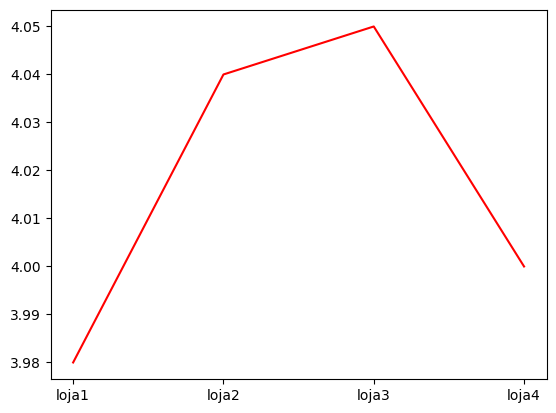

In [163]:
plt.plot(avaliacoes_lojas.index, avaliacoes_lojas["Média de Avaliação"], color="red")
plt.show()

As lojas que apresentam um melhor desempenho são as lojas 2 e 3, com destaque para a 3, já a diferença entre as lojas 1 e 4 não parece ser consideravel para que esse parametro seja relevante para tomar uma decisão sobre essas duas lojas.
Posto que, a diferença entre as avaliações é de apenas 0,02 e que a loja 1 tem um faturamento muito maior.

###**4.Produtos Mais e Menos Vendidos**

Nessa parametro nosso objetivo é fornecer uma classificação dos produtos que mais vendem e menos vendem em cada uma das lojas.

A apresentação dos dados será apresentada em uma tabela, pois assim conseguimos observar facilmente o destaque positivo e negativo de cada uma das lojas.

#####**Tabela Produtos Loja 1**
*Quantidade de cada produto vendido.*

In [164]:
produtos_vendidos1 = pd.DataFrame(produtos_vendidos1)
display(produtos_vendidos1)

,loja1
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56
Blocos de montar,56
Bola de basquete,55
Bicicleta,54
Copo térmico,54


#####**Tabela Produtos Loja 2**
*Quantidade de cada produto vendido.*

In [168]:
produtos_vendidos2 = pd.DataFrame(produtos_vendidos2)
display(produtos_vendidos2)



,loja2
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Violão,58
Pandeiro,58
Secadora de roupas,57
Celular Plus X42,55
Blocos de montar,54
Guarda roupas,54


#####**Tabela Produtos Loja 3**
# *Quantidade de cada produto vendido.*

In [170]:
produtos_vendidos3 = pd.DataFrame(produtos_vendidos3)
display(produtos_vendidos3)


,loja3
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56
Jogo de panelas,55
Cômoda,55
Smart TV,54
Fogão,53
Corda de pular,53
Modelagem preditiva,53


#####**Tabela Produtos Loja 4**
# *Quantidade de cada produto vendido.*

In [171]:
produtos_vendidos4 = pd.DataFrame(produtos_vendidos4)
display(produtos_vendidos4)


,loja4
Produto,
Cama box,62
Faqueiro,59
Dashboards com Power BI,56
Cama king,56
Carrinho controle remoto,55
Mesa de jantar,55
Cômoda,55
Smart TV,54
Blocos de montar,54


Com base nas tabelas, podemos pensar sobre o valor agregado que está presente nos produtos mais e menos vendidos, isso pode nos orientar sobre o impacto desse parametro dentro do faturamento de cada loja.

A loja 1, apresenta um empate entre os três produtos mais vendidos, com 60 unidades de cada, e são produtos de um grande valor agregado, já que são dois eletrodomésticos e um móvel. Nos produtos menos vendidos estam presentes itens de baixo valor agregado. Com base nesse desempenho, faz sentido o estabelecimento apresentar o maior faturamento dentro das quatro.

As lojas 2, 3 e 4, apresentam um comportamento parecido, tem itens de alto valor agregado e de baixo valor agregado misturados nos produtos que mais vendem  e que menos vendem.

Como destacado, em seção anterior, o maior impacto no desempenho das lojas está agregado a venda de pródutos nas categorias móveis, eletrônicos, eletrodomésticos e instrumentos musicais que apresentam um maior valor agregado.

Por exemplo, vamos olhar para o item **Geladeira**, enquanto as lojas 1, 2 e 3, vendem cerca de 50 produtos deste, a loja 4 vende apenas 38, claro que este é apenas um exemplo de um produto, mas em outros produtos das categorias citadas isso também ocorre, representando assim o padrão da loja 4.


###**5.Frete Médio**

Nessa parametro nosso objetivo é fornecer o desempenho de cada loja em relação ao frete.
Para cada loja vamos mostar os valores obtidos através de tabelas e gráficos.

#####**Tabela Valor do Frete Médio de cada Loja**
*Calculo do valor do frete médio de cada uma das lojas.*

In [180]:
frete = {"loja1": frete_loja1, "loja2": frete_loja2, "loja3": frete_loja3, "loja4": frete_loja4}
frete = pd.DataFrame.from_dict(frete, orient="index")
frete.columns = ["Frete Médio"]
display(frete)

,Frete Médio
loja1,34.69
loja2,33.62
loja3,33.07
loja4,31.28


#####**Gráfico Valor do Frete Médio de cada Loja**
*Demonstração gráfica para melhorar a visualização.*

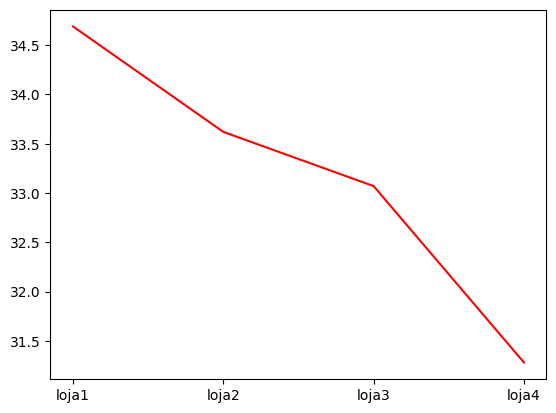

In [181]:
plt.plot(frete.index, frete["Frete Médio"], color="red")
plt.show()

Observamos que o custo da loja 4, em relação ao frete, é bem menor que o das outras três lojas, mas como destacamos que ele vende uma quantidade de produtos que gasta mais em relação ao frete, como móveis e eletrodomésticos, por exemplo.

Elaboramos uma segunda tabela e um segundo gráfico que apresentam o impacto do frete no faturamento da loja.


#####**Tabela Impacto do Frete no Faturamento**
*Calculo do valor do Faturamento Total menos o Custo total do Frete.*

In [184]:
colunas = ["loja1", "loja2", "loja3", "loja4"]
faturamento_menos_frete = {"loja1": faturamento_menos_frete_loja1, "loja2": faturamento_menos_frete_loja2, "loja3": faturamento_menos_frete_loja3, "loja4": faturamento_menos_frete_loja4}

faturamento_menos_frete = pd.DataFrame.from_dict(faturamento_menos_frete, orient="index")
faturamento_menos_frete.columns = ["Faturamento Menos Frete"]
display(faturamento_menos_frete)

,Faturamento Menos Frete
loja1,1452671.15
loja2,1409144.90
loja3,1386002.37
loja4,1310741.70


#####**Gráfico Impacto do Frete no Faturamento**
*Calculo do valor do Faturamento Total menos o Custo total do Frete.*

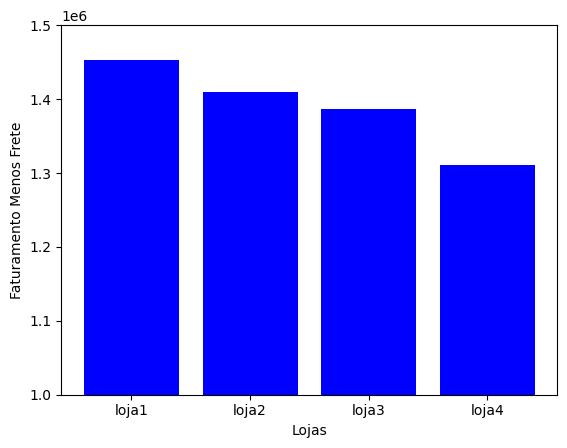

In [185]:
plt.bar(faturamento_menos_frete.index, faturamento_menos_frete["Faturamento Menos Frete"], color="blue")
plt.ylabel("Faturamento Menos Frete")
plt.xlabel("Lojas")
plt.ylim(1000000, 1500000)
plt.show()
#

Apesar da loja 04 apresentar um valor médio de frete menor, o impacto do frete no faturamento não é relevante. As outras três lojas continuam faturando mais menos com fretes mais altos.

###**Conclusão**

Tomando como base os parâmetros indicados e discutidos acima, na maioria deles do desempenho das lojas 1, 2 e 3 é superior ao da loja 4, exceto na questão do frete médio, onde a loja 4 se destaca positivamente e a avaliação onde o desempenho dela é melhor que o da loja 1.

Porém, mesmo com esses pontos de destaque, em termos gerais a loja 4 é que apresenta um desempenho mais abaixo em relação as demais.

Por isso, caso a decisão de vender uma das lojas seja tomada, nossa recomendação é que aescolha de venda seja pela loja 4.